In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# 1

In [39]:
def permutiations(n, i):
    """
    Find the number of permutation of
    n choose i
    """
    return special.factorial(n) / (special.factorial(n - i) * special.factorial(i))

In [40]:
c = permutiations(4, np.array([0, 1, 2, 3, 4]))

# 2

In [4]:
from scipy.constants import k

In [5]:
e = np.array([1.1e-19, 2.0e-19, 2.9e-19, 3.7e-19])
q_0 = 1.21

In [38]:
T = np.linspace(100, 1000, 10)
T

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [7]:
q = np.zeros_like(T)
for i in range(len(q)):
    q_i_norm = np.exp(- e / (k * T[i]))
    q[i] = q_0 * (1 + np.sum(c[1:] * q_i_norm))

Text(0, 0.5, 'q')

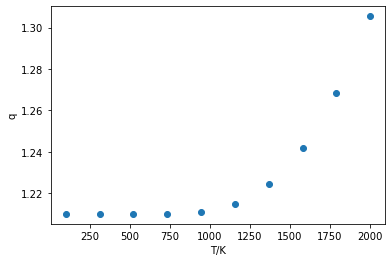

In [8]:
plt.plot(T, q, 'o')
plt.xlabel('T/K')
plt.ylabel('q')

In [9]:
gamma = 1e-19

In [25]:
def partition_noncoop(n, T):
    q = 0
    s = np.exp(-gamma / (k * T))
    for i in range(n+1):
        q += permutiations(n, i) * (s ** i)
    return q

In [26]:
T = np.linspace(100, 2000, 10)
q = np.zeros_like(T)
for i in range(len(q)):
    q[i] = q_0 * partition_noncoop(4, T[i])

Text(0, 0.5, 'q')

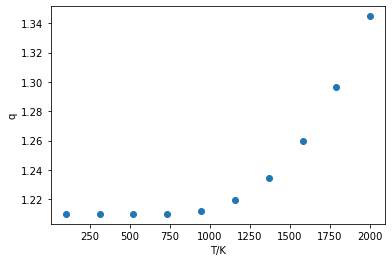

In [27]:
plt.plot(T, q, 'o')
plt.xlabel('T/K')
plt.ylabel('q')

In [28]:
T = np.linspace(100, 2000, 10)
q20 = np.zeros_like(T)
for i in range(len(q)):
    q20[i] = q_0 * partition_noncoop(20, T[i])

Text(0, 0.5, 'q')

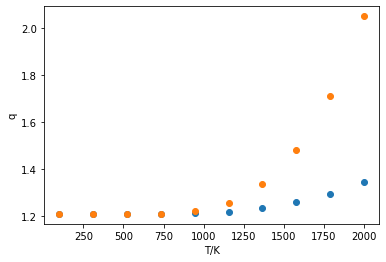

In [30]:
plt.plot(T, q, 'o')
plt.plot(T, q20, 'o')
plt.xlabel('T/K')
plt.ylabel('q')

In [31]:
def partition(n, sigma, s):
    return 1 + sigma * (n + 1) * np.sum(s ** np.arange(1, n + 1)) - sigma * np.sum(np.arange(1, n + 1) * s ** np.arange(1, n + 1))

In [32]:
def fraction(n, i, sigma, s):
    q = partition(n, sigma, s)
    return ((n - i + 1) * sigma * s ** i) / q

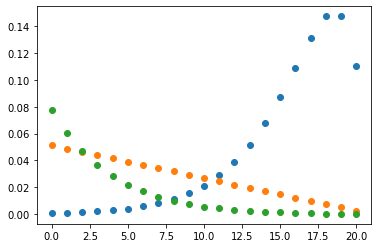

In [33]:
i = np.arange(0, 21)
plt.plot(i, fraction(20, i, 5e-3, 1.5), 'o')
plt.plot(i, fraction(20, i, 5e-3, 1.), 'o')
plt.plot(i, fraction(20, i, 5e-3, 0.82), 'o')

In [37]:
print(np.sum(i * fraction(20, i, 5e-3, 1.5)))
print(np.sum(i * fraction(20, i, 5e-3, 1.)))
print(np.sum(i * fraction(20, i, 5e-3, 0.82)))

15.93545878117682
3.756097560975611
1.062901267188687
